# Práctica III - Regresión Logística y Análisis ROC

_Pareja 6_
* David Kaack Sánchez
* Carlos César Rodríguez García

A continuación, se expondrán los resultados obtenidos al emplear el clasificador de Regresión Logística con diversas combinaciones de épocas y constantes de aprendizaje. Asimismo, se realizará una comparación entre nuestra implementación y aquella desarrollada utilizando la librería `Scikit-learn`.

Posteriormente, se llevará a cabo un análisis de la curva ROC para los tres clasificadores implementados hasta el momento (KNN, Naive Bayes y Regresión Logística). En este análisis, se mostrarán los puntos en el espacio ROC y se trazará la correspondiente curva.

## Setup

### Importaciones

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import utilerias as utils # Funciones para facilitar la presentación de datos en el Notebook
from multiprocessing import Pool
from ClasificadorKNN import ClasificadorKNN
from ClasificadorNaiveBayes import ClasificadorNaiveBayes
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from ClasificadorRegresionLogisticaScikit import ClasificadorRegresionLogisticaScikit
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple

In [46]:
from importlib import reload 
reload(utils)

<module 'utilerias' from '/home/carloscrg19/Desktop/UAM/fundamentos_de_aprendizaje_automatico/fundamentos-de-aprendizaje-automatico/FAAP3_1461_6/utilerias.py'>

### Constantes
Variables globales a utilizar en las evaluaciones

In [2]:
# Valores comunes para comparar Regresión Logística Propia y la implentación con Scikit-learn
CONSTANTES_APRENDIZAJE = [0.01, 0.05, 0.42, 1, 2]
EPOCAS = [50, 100, 150]

## Apartado 1 - Regresión Logística Propia

### Resultados para dataset "heart"

In [3]:
resultados_regresion_logistica_propia_heart = utils.resultados_regresion_logistica(
    Clasificador=ClasificadorRegresionLogistica,
    dataset="heart",
    Ks=CONSTANTES_APRENDIZAJE,
    epocas=EPOCAS
)
resultados_regresion_logistica_propia_heart

,K,Epocas,Normaliza,Error Promedio,Desviación Estándar
0,0.01,50,True,0.127273,0.005143
1,0.01,100,True,0.127273,0.005143
2,0.01,150,True,0.127273,0.005143
3,0.05,150,True,0.129697,0.009071
4,0.05,50,True,0.129697,0.009071
5,0.05,100,True,0.129697,0.009071
6,0.42,150,True,0.158788,0.007472
7,0.42,50,True,0.158788,0.007472
8,0.42,100,True,0.158788,0.007472
9,1.00,50,True,0.179394,0.018141


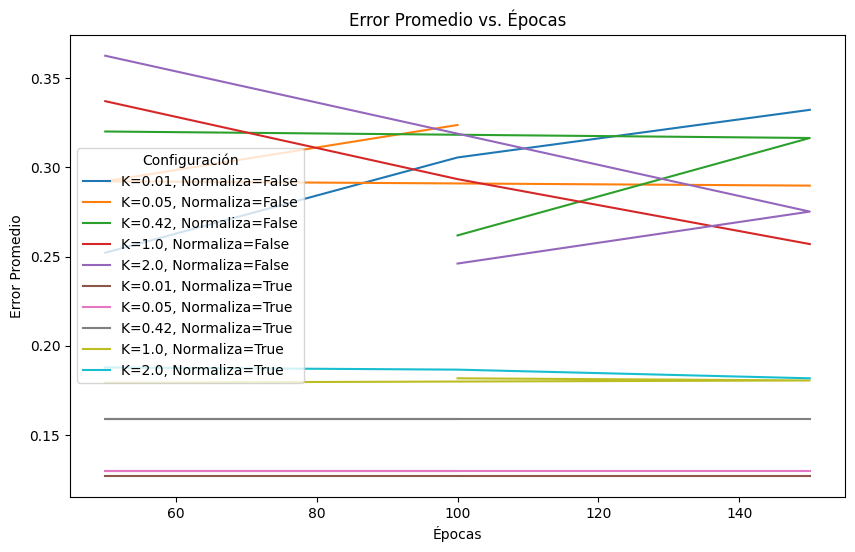

In [4]:
utils.grafica_lineal_error_promedio_vs_epocas(resultados_regresion_logistica_propia_heart)

<Figure size 1000x600 with 0 Axes>

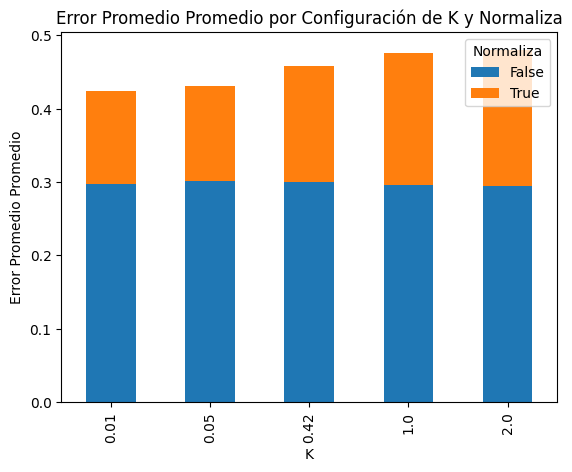

In [5]:
utils.grafica_de_barras_error_promedio(resultados_regresion_logistica_propia_heart)

### Resultados para dataset "wdbc"

In [6]:
resultados_regresion_logistica_propia_wdbc = utils.resultados_regresion_logistica(
    Clasificador=ClasificadorRegresionLogistica,
    dataset="wdbc",
    Ks=CONSTANTES_APRENDIZAJE,
    epocas=EPOCAS
)
resultados_regresion_logistica_propia_wdbc

,K,Epocas,Normaliza,Error Promedio,Desviación Estándar
0,0.01,100,True,0.021569,0.002773
1,0.01,50,True,0.025490,0.002773
2,0.01,150,True,0.025490,0.005546
3,0.05,50,True,0.029412,0.008319
4,0.05,100,True,0.029412,0.008319
5,0.05,150,True,0.029412,0.008319
6,1.00,150,True,0.039216,0.007337
7,2.00,50,True,0.039216,0.015439
8,0.42,150,True,0.039216,0.015439
9,1.00,50,True,0.043137,0.019411


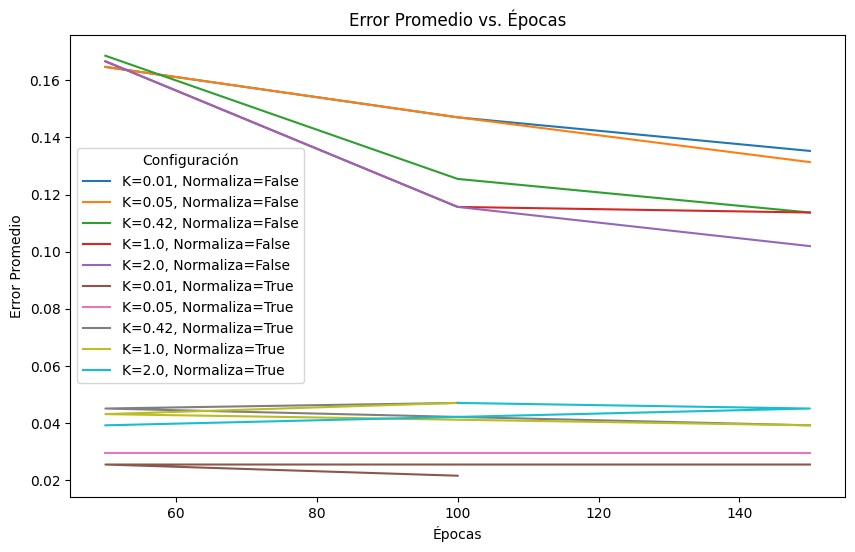

In [7]:
utils.grafica_lineal_error_promedio_vs_epocas(resultados_regresion_logistica_propia_wdbc)

<Figure size 1000x600 with 0 Axes>

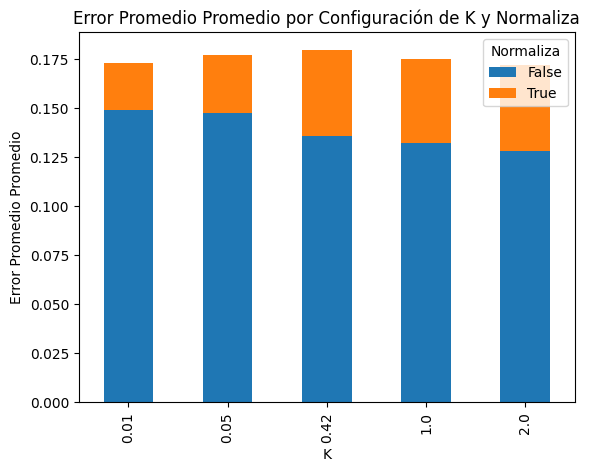

In [8]:
utils.grafica_de_barras_error_promedio(resultados_regresion_logistica_propia_wdbc)

### Discusión de resultados

Observando los resultados, se puede notar lo siguiente:

__Impacto de la constante de aprendizaje (K)__

Se destaca que, de manera general, valores más bajos de la constante de aprendizaje (K) se asocian con un error promedio menor. Este hallazgo sugiere que un valor más bajo de K favorece un mejor rendimiento del modelo; en términos del cálculo, representa los escenarios donde hay un menor desplazamiento con respecto al gradiente.

Esta relación es especialmente notoria en los datos normalizados, donde el error promedio disminuye a medida que K disminuye. En contraste, en los datos no normalizados, este patrón no es tan evidente; de hecho, el mejor rendimiento se observa con el valor más alto de la constante.

__Impacto del número de épocas__

El comportamiento en relación con el número de épocas es intrigante. Cuando los valores están normalizados, no se percibe una influencia significativa del número de épocas utilizado. Esto sugiere que un modelo que utiliza 50 épocas y otro que utiliza 150 son igualmente efectivos.

Sin embargo, en los datos no normalizados, sí se observa que el rendimiento mejora con un aumento en la cantidad de épocas. Aunque no hay una tendencia clara entre la cantidad de épocas y el error promedio, se nota que _modelos con más épocas tienden a tener un error promedio menor_. Específicamente, con el dataset "heart" para un valor de la constante de aprendizaje de 0.01, en datos no normalizados, la mejora entre un modelo con 50 épocas y otro con solo 150 es de aproximadamente 34.14%.

__Impacto de la normalización de datos__

En términos generales, la normalización de datos parece contribuir positivamente a la reducción del error promedio. Los modelos con normalización tienden a exhibir errores promedio más bajos en comparación con los modelos sin normalización.reducción del error promedio. Los modelos con normalización tienden a exhibir errores promedio más bajos en comparación con los modelos sin normalización.

En resumen, se sugiere explorar configuraciones con valores bajos de la constante de aprendizaje y la normalización de datos para mejorar el rendimiento del modelo de Regresión Logística en los conjuntos de datos explorados.

Es innegable que existe una inclinación hacia la mejora del rendimiento del modelo al aumentar el número de épocas. Sin embargo, es importante señalar que, a partir de un cierto umbral, se observa una mejora marginal, sugiriendo que el beneficio de incrementar aún más las épocas es limitado.

## Apartado 2 - Regresión Logística Scikit-learn

Para evaluar nuestra implementación, se desarrolló una segunda utilizando los clasificadores de la biblioteca `Scikit-learn`, específicamente, el `SGDClassifier`.

Se realizó una comparación exhaustiva del rendimiento de ambos clasificadores al emplear los mismos valores para las constantes de aprendizaje (almacenadas en la variable `CONSTANTES_DE_APRENDIZAJE`) y el número de épocas (registrado en la variable `EPOCAS`).

### Resultados para dataset "heart"

In [27]:
resultados_regresion_logistica_scikit_heart = utils.resultados_regresion_logistica(
    Clasificador=ClasificadorRegresionLogisticaScikit,
    dataset="heart",
    Ks=CONSTANTES_APRENDIZAJE,
    epocas=EPOCAS
)
resultados_regresion_logistica_scikit_heart

,K,Epocas,Normaliza,Error Promedio,Desviación Estándar
0,0.01,100,True,0.126061,0.004535
1,0.05,150,True,0.127273,0.002969
2,0.01,150,True,0.128485,0.004535
3,0.01,50,True,0.129697,0.004535
4,0.05,100,True,0.129697,0.006181
5,0.05,50,True,0.130909,0.007855
6,2.00,150,True,0.170909,0.016531
7,0.42,150,True,0.175758,0.032705
8,1.00,150,True,0.202424,0.056828
9,2.00,100,True,0.208485,0.032024


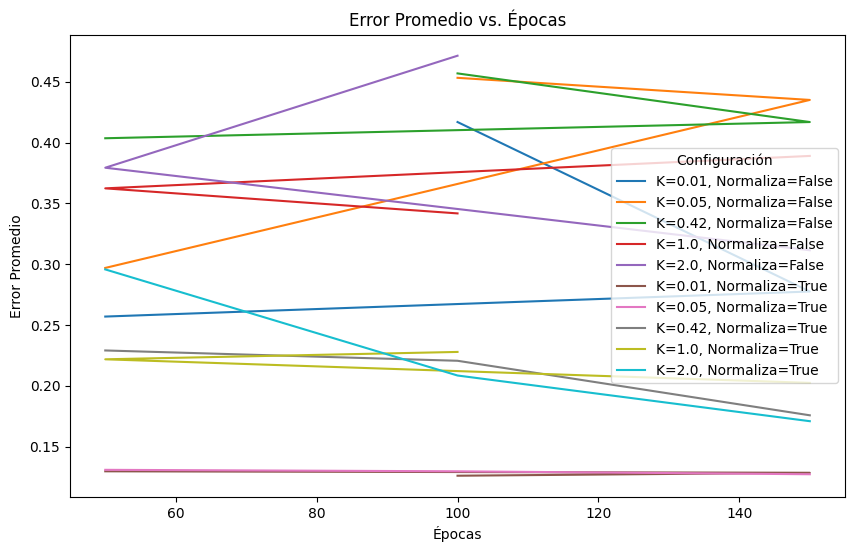

In [28]:
utils.grafica_lineal_error_promedio_vs_epocas(resultados_regresion_logistica_scikit_heart)

<Figure size 1000x600 with 0 Axes>

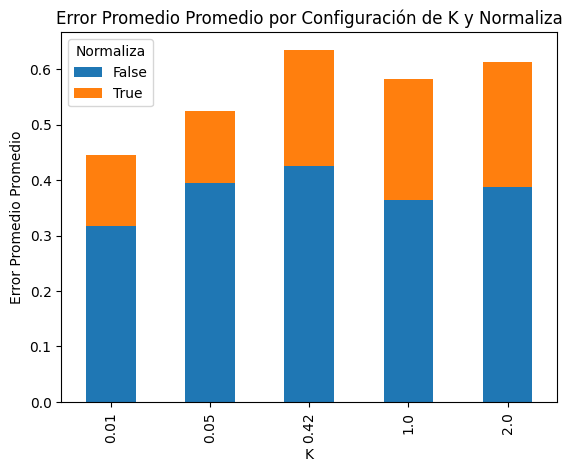

In [29]:
utils.grafica_de_barras_error_promedio(resultados_regresion_logistica_scikit_heart)

### Resultados para dataset "wdbc"

In [31]:
resultados_regresion_logistica_scikit_wdbc = utils.resultados_regresion_logistica(
    Clasificador=ClasificadorRegresionLogisticaScikit,
    dataset="wdbc",
    Ks=CONSTANTES_APRENDIZAJE,
    epocas=EPOCAS
)
resultados_regresion_logistica_scikit_wdbc

,K,Epocas,Normaliza,Error Promedio,Desviación Estándar
0,0.01,50,True,0.019608,0.005546
1,0.01,100,True,0.021569,0.002773
2,0.01,150,True,0.021569,0.002773
3,0.05,50,True,0.025490,0.009998
4,0.05,150,True,0.027451,0.011092
5,0.42,150,True,0.029412,0.012707
6,2.00,50,True,0.029412,0.008319
7,0.05,100,True,0.029412,0.008319
8,1.00,50,True,0.029412,0.012707
9,2.00,100,True,0.033333,0.002773


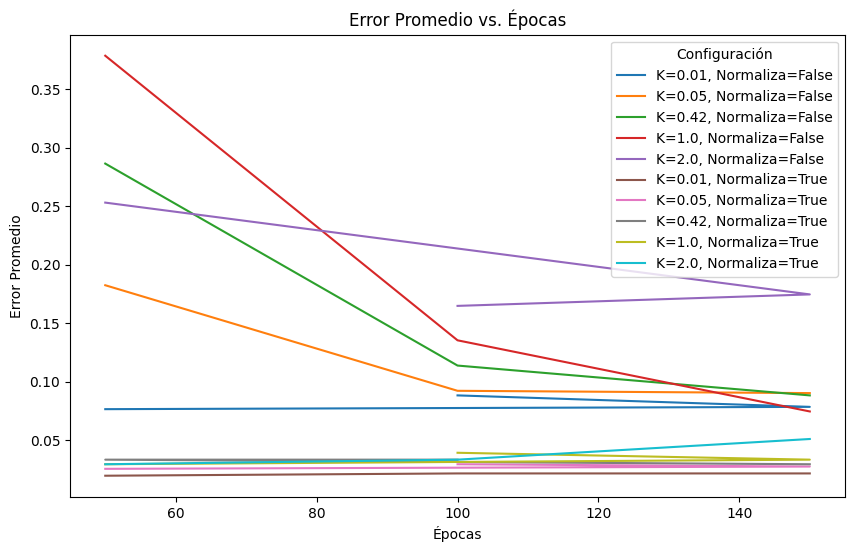

In [32]:
utils.grafica_lineal_error_promedio_vs_epocas(resultados_regresion_logistica_scikit_wdbc)

<Figure size 1000x600 with 0 Axes>

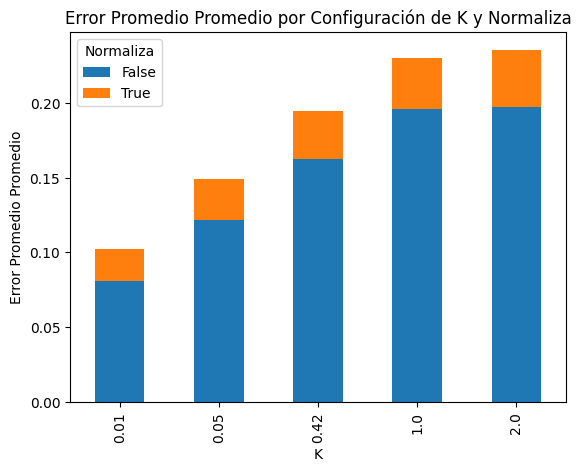

In [33]:
utils.grafica_de_barras_error_promedio(resultados_regresion_logistica_scikit_wdbc)

### Discusión de resultados

__Comparación de Desempeño General__
   
* Ambas implementaciones presentan errores promedio similares en general, aunque por lo general, la implementación con `Scikit` tiene mejor rendimiento.
* Ambos modelos tienden a obtener mejores resultados (errores promedio más bajos) con tasas de aprendizaje (K) más bajas (0.01) y un número moderado de épocas.

**Impacto de la Normalización:**

* En la implementación propia, la normalización parece tener un impacto positivo en el rendimiento, ya que en la mayoría de los casos, los errores promedio son más bajos cuando se aplica la normalización.
* En Scikit-learn, la relación no es tan clara, y hay casos donde el rendimiento es mejor sin normalización.

**Impacto de Hiperparámetros (K y Épocas):**

* Ambos modelos tienden a tener un rendimiento mejor con tasas de aprendizaje más bajas (0.01).
* El rendimiento varía con el número de épocas, pero generalmente se observa un rendimiento óptimo con un número mayor de épocas en ambas implementaciones.

En resumen, ambos modelos muestran resultados comparables en términos de errores promedio, pero hay diferencias en cómo ciertos hiperparámetros afectan el rendimiento. La normalización parece ser más beneficiosa en la implementación propia en comparación con `Scikit-learn` en este conjunto de datos específico.

## 3. Análisis ROC

A continuación, se compara el rendimiento de tres clasificadores implementados durante el curso: `KNN`, `Naive Bayes` y el actual, `Regresión Logística`.

Esta evaluación se realiza mediante el análisis del espacio ROC, fundamental para medir el desempeño de los clasificadores en términos de tasas de verdaderos y falsos positivos en diversos puntos de decisión. Este enfoque integral permite la selección del modelo más apropiado según las necesidades específicas del problema, considerando el equilibrio entre sensibilidad y especificidad.

La comparación se lleva a cabo en los dos conjuntos de datos ("heart" y "wdbc") mediante la validación simple, utilizando el 30% de los datos para pruebas y el 70% para entrenamiento con los mismos índices de partición.

```
def crea_particion_simple(datos):
    validacion_simple = ValidacionSimple(numeroEjecuciones=1, proporcionTest=30)
    validacion_simple.creaParticiones(datos.datos)

    return validacion_simple.particiones[0]
```

### Inicialización de los clasificadores (KNN, Naive Bayes y Regresión Logística)

Se seleccionaron los hiperparámetros con mejor rendimiento en las pŕacticas anteriores para cada clasificador.

In [42]:
clasificador_knn = ClasificadorKNN(K=5, normaliza=True)
clasificador_naive_bayes = ClasificadorNaiveBayes(con_laplace=True)
clasificador_regresion_logistica = ClasificadorRegresionLogistica(K=0.05, epocas=100, normaliza=True)

### Inicialización de particiones

In [43]:
datos_heart = Datos("heart.csv")
datos_wdbc = Datos("wdbc.csv")

particion_heart = utils.crea_particion_simple(datos_heart)
particion_wdbc = utils.crea_particion_simple(datos_wdbc)

### Análisis para datos "heart"

In [48]:
# Se obtienen los valores para la proporción de verdaderos positivos y de falsos positivos
rates_knn = utils.obtener_tpr_fpr(
    clasificador=clasificador_knn, datos=datos_heart, particion=particion_heart
)
rates_naive_bayes = utils.obtener_tpr_fpr(
    clasificador=clasificador_naive_bayes, datos=datos_heart, particion=particion_heart
)
rates_regresion_logistica = utils.obtener_tpr_fpr(
    clasificador=clasificador_regresion_logistica, datos=datos_heart, particion=particion_heart
)

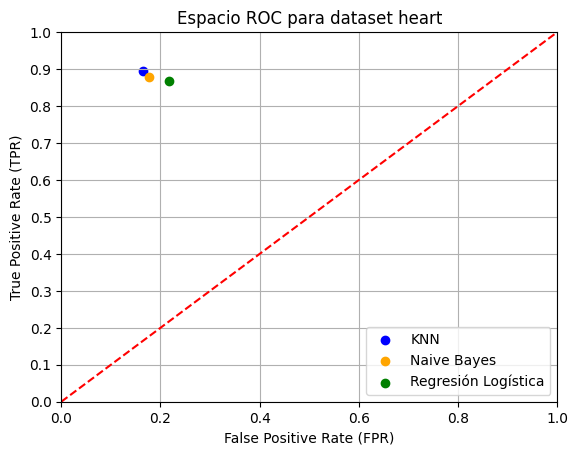

In [49]:
utils.grafica_espacio_ROC(
    nombre_dataset="heart",
    rates_knn=rates_knn,
    rates_naive_bayes=rates_naive_bayes, 
    rates_regresion_logistica=rates_regresion_logistica
)

Basándonos en el espacio ROC del dataset "heart", se llega a la conclusión de que `KNN` muestra resultados superiores, al encontrarse más cercano al punto (0, 1). Este posicionamiento sugiere una alta sensibilidad (Tasa de Verdaderos Positivos). Por otro lado, aunque por una pequeña diferencia, la Regresión Logística exhibe el rendimiento menos favorable.

Cabe recordar que en el espacio ROC, la preferencia por un modelo se basa en cuán alto se ubica, ya que el eje Y refleja un mayor número de predicciones acertadas. Es relevante destacar que todos los modelos superan el desempeño aleatorio, representado por la línea diagonal de color rojo.

### Análisis para datos "wdbc"

In [50]:
rates_knn = utils.obtener_tpr_fpr(
    clasificador=clasificador_knn, datos=datos_wdbc, particion=particion_wdbc
)
rates_naive_bayes = utils.obtener_tpr_fpr(
    clasificador=clasificador_naive_bayes, datos=datos_wdbc, particion=particion_wdbc
)
rates_regresion_logistica = utils.obtener_tpr_fpr(
    clasificador=clasificador_regresion_logistica, datos=datos_wdbc, particion=particion_wdbc
)

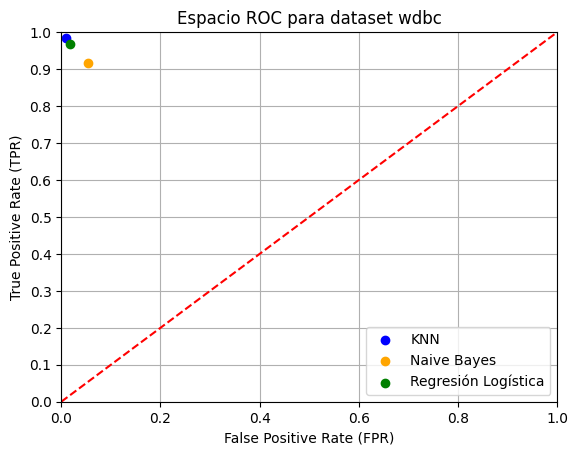

In [51]:
utils.grafica_espacio_ROC(
    nombre_dataset="wdbc",
    rates_knn=rates_knn,
    rates_naive_bayes=rates_naive_bayes, 
    rates_regresion_logistica=rates_regresion_logistica
)

En el conjunto "wdbc", todos los modelos muestran excelentes resultados, con un desplazamiento mínimo en la dirección de la Tasa de Falsos Positivos.

Destaca que Naive Bayes es el que presenta un rendimiento menos favorable en este escenario.

### Apartado 4 - Curva ROC para Regresión Logística

Por último, se interpreta la curva ROC, graficada a través del algoritmo propuesto por Fawcett:

1. **Obtención de puntuaciones o probabilidades:** El clasificador binario asigna puntuaciones o probabilidades a las instancias de acuerdo con la probabilidad de que pertenezcan a la clase positiva. Estas puntuaciones se utilizan para clasificar las instancias.

2. **Ordenamiento de instancias:** Las instancias se ordenan de acuerdo con sus puntuaciones en orden descendente. Esto significa que las instancias con las puntuaciones más altas estarán en la parte superior de la lista.

3. **Iteración a través de umbrales:** Se itera sobre las instancias de test y si el resultado da un verdadero positivo se desplaza en dirección vertical; si se trata de un falso positivo, se desplaza horizontalmente.

4. **Construcción de la curva ROC:** Se construye la curva ROC trazando los puntos (FPR, TPR) para cada umbral. Cada punto en la curva representa el rendimiento del clasificador bajo un umbral específico.

5. **Línea diagonal y área bajo la curva (AUC):** La línea diagonal en un espacio ROC representa el rendimiento de un clasificador aleatorio. Un clasificador perfecto estaría en la esquina superior izquierda de la curva. El área bajo la curva (AUC) proporciona una medida cuantitativa del rendimiento del clasificador.

#### Curva para datos "heart"

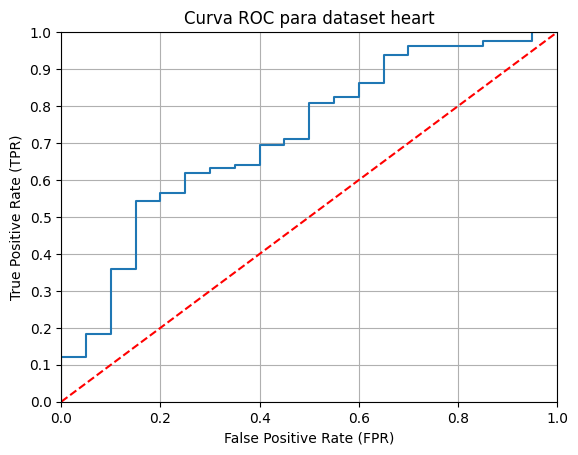

In [56]:
utils.grafica_curva_ROC(
    nombre_dataset="heart",
    clasificador=clasificador_regresion_logistica,
    datos=datos_heart,
    particion=particion_heart
)

Se nota que el área bajo la curva supera el 0.5, indicando un rendimiento superior al azar. Pareciera que el modelo destaca especialmente en la región más conservadora de la gráfica, comprendida entre un FPR de 0.1 y 0.2. Esto se traduce en una mayor habilidad del clasificador para identificar posibles positivos en comparación con su capacidad para identificar posibles negativos.

En la sección final de la gráfica, se evidencia un aumento significativo en los falsos positivos, señalando que el modelo presenta ciertas limitaciones en estos casos particulares.